<a href="https://colab.research.google.com/github/HARIS2003JULY/Housing-Price-Prediction/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Iris Flower Classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC

# 1) Load Dataset

df = pd.read_csv("/content/Iris.csv")

# Drop ID column (not useful)
df.drop("Id", axis=1, inplace=True)

print(df.head())
print(df.info())


# 2) Split features & target
X = df.drop("Species", axis=1)
y = df["Species"]

# ---------------------------
# 3) Train-Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------
# 4) Feature Scaling
# ---------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------
# 5) Train Model (SVM)
# ---------------------------
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

# ---------------------------
# 6) Predictions
# ---------------------------
y_pred = model.predict(X_test_scaled)

# ---------------------------
# 7) Model Evaluation
# ---------------------------
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
Accuracy: 0.9666666666666667

Classification Report:

                 precision    recall  f

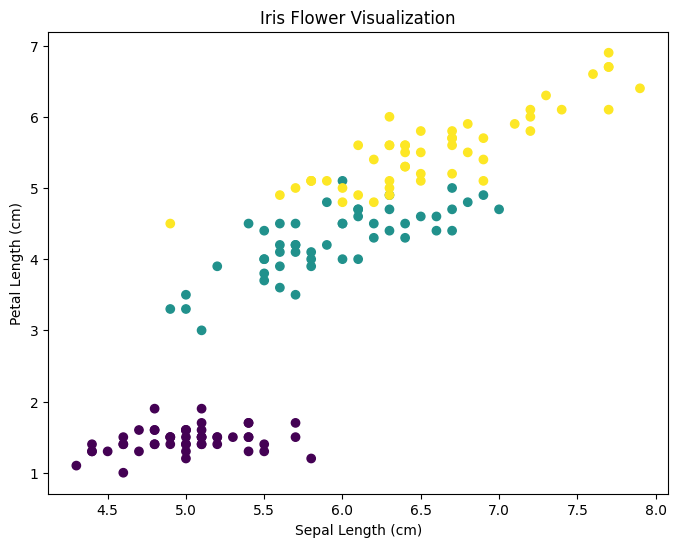

In [2]:
plt.figure(figsize=(8,6))
plt.scatter(df["SepalLengthCm"], df["PetalLengthCm"], c=pd.factorize(df["Species"])[0])
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.title("Iris Flower Visualization")
plt.show()
